<a href="https://colab.research.google.com/github/VDidyk/AI/blob/master/module4/%D0%94%D0%97_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [124]:
import pandas as pd

Дані медичне страхування

In [125]:
# трохи обробки даних
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv')

df['sex'] = df['sex'].map({'male': 0, 'female':1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes':1})

df = df.drop(columns=['region'])

data = df[['age', 'bmi', 'expenses']]
df[['age', 'bmi', 'expenses']] = (data - data.min()) / (data.max() - data.min())

In [126]:
df.head()

,age,sex,bmi,children,smoker,expenses
0,0.021739,1,0.320755,0,1,0.251611
1,0.000000,0,0.479784,1,0,0.009636
2,0.217391,0,0.458221,3,0,0.053115
3,0.326087,0,0.180593,0,0,0.333010
4,0.304348,0,0.347709,0,0,0.043816


Потрібно на основі інформації людини спрогнозувати розмір її страховки `expenses`

# Завдання 1
Створіть клас Dataset

In [127]:
from torch.utils.data import Dataset
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.set_default_device(device)


class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values).to(device)
      self.y = torch.FloatTensor(y.values).to(device)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns=['expenses'])
y = df['expenses']

dataset = MyDataset(X, y)

# Завдання 2
Створіть DataLoader. Перевірте розміри даних в першому пакеті. Розмір пакетів оберіть самостійно

In [128]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=True,
                        generator=torch.Generator(device=device)
)

In [129]:
X_batch, y_batch = next(iter(dataloader))
X_batch.shape

torch.Size([128, 5])

# Завдання 3
Створіть нейромережу:
* Кількість шарів оберіть між 1-5
* Виберіть різні функції активації: Relu, LeakyRelu, Swish
* Кілкість нейронів у прихованих шарах повинна **не зростати**

In [130]:
from torch import nn


model = nn.Sequential(
    nn.Linear(5, 5),
    nn.LeakyReLU(2),
    nn.Linear(5, 4),
    nn.LeakyReLU(2),
    nn.Linear(4, 1)
)

model

Sequential(
  (0): Linear(in_features=5, out_features=5, bias=True)
  (1): LeakyReLU(negative_slope=2)
  (2): Linear(in_features=5, out_features=4, bias=True)
  (3): LeakyReLU(negative_slope=2)
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [131]:
from torchsummary import summary

summary(model, input_size=(5,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 5]              30
         LeakyReLU-2                    [-1, 5]               0
            Linear-3                    [-1, 4]              24
         LeakyReLU-4                    [-1, 4]               0
            Linear-5                    [-1, 1]               5
Total params: 59
Trainable params: 59
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Завдання 4
Визначте функцію втрат та оптимізатор

In [132]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Завдання 5
Натренуйте нейромережу. візміть невелику кількість епох

In [133]:
import numpy as np

num_epochs = 300

losses=[]
for epoch in range(num_epochs):
  losses_ = []
  for X_batch, y_batch in dataloader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        losses_.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

  losses.append(np.mean(losses_))

  if epoch % 1 == 0:
          print(f'loss={losses[-1]}')


loss=0.09474075111475858
loss=0.0908595926382325
loss=0.08615189655260606
loss=0.08269771933555603
loss=0.07894393666224046
loss=0.0761718824505806
loss=0.07343119518323378
loss=0.07091176103461873
loss=0.06843542612411758
loss=0.06718036058274182
loss=0.06505571373484352
loss=0.06306272778998721
loss=0.06147113171490756
loss=0.05999884314157746
loss=0.05810715156522664
loss=0.057354300198229874
loss=0.055786279114809906
loss=0.05506904592568224
loss=0.05395781011743979
loss=0.05351139164783738
loss=0.051817896352572876
loss=0.05197490311481736
loss=0.0517890297553756
loss=0.04998979819091884
loss=0.04917756840586662
loss=0.049662797288461166
loss=0.04872479323636402
loss=0.047982361844994804
loss=0.04747659306634556
loss=0.04735529659823938
loss=0.04727844656868414
loss=0.04637350345199758
loss=0.04677218808369203
loss=0.04582927172834223
loss=0.0449758805334568
loss=0.044761963188648224
loss=0.04564775594256141
loss=0.04431414807384664
loss=0.04402336850762367
loss=0.0441787554459138

(0.0, 0.5)

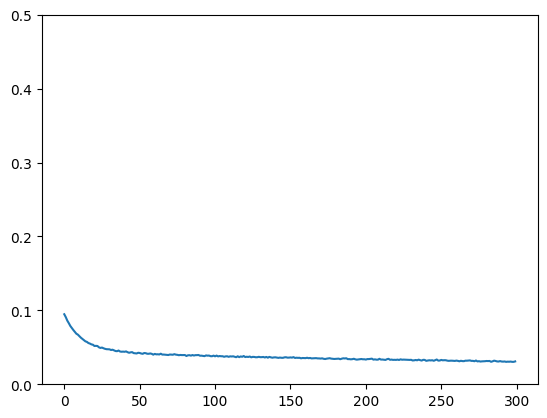

In [134]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylim(0, 0.5)

# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [135]:
torch.save(model.state_dict(), 'model_state_dict.pt')

In [136]:
model.load_state_dict(torch.load('model_state_dict.pt'))

<All keys matched successfully>

In [137]:
y[0]

0.25161073135599604

In [138]:
X_data = torch.FloatTensor(X.values[[0]])
X_data = X_data.to(device)

print(X_data)
print(X_data.shape)

tensor([[0.0217, 1.0000, 0.3208, 0.0000, 1.0000]], device='cuda:0')
torch.Size([1, 5])


In [139]:
model(X_data)

tensor([[0.2264]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [140]:
with torch.no_grad(): # без градієнтів
  print(model(X_data))

tensor([[0.2264]], device='cuda:0')
